# **MODULES IMPORT**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# **FEATURE PROCESSING**

In [28]:
data1 = pd.read_csv('data.csv')

In [29]:
data1.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [30]:
x1 = np.array(data1['radius_mean'].values)
x2 = np.array(data1['smoothness_mean'].values)
x = [x1,x2]

In [44]:
degree = 5
iteration = 100000

In [32]:
y = data1['diagnosis'].values
for i in range (0,len(y)):
  if(y[i]=='M'):
    y[i]=1
  else:
    y[i]=0

# **FORMULAS**

**Sigmoid Function**
$$f_{(w,b)}(z) = \frac{1}{1+e^{-z}}$$
$$z = w.x+b$$
*It returns values between 0 and 1*
<br><br>
**COST FUNCTION**
$$j_{(w,b)} = \frac{1}{m}\sum_{i=1}^{m}[loss(f_{(w,b)}(x^i),y^i]$$
$$loss = -y^i.log(f_{(w,b)}x^i)-(1-y^i).log(1-f_{(w,b)}x^i)$$
*Here the loss fuction helps to penalize the wrong output more*
<br><br>
**GRADIENT FUNCTION**

$$\frac{dJ_{(w,b)}}{dw_j} = \frac{1}{m}\sum_{i=1}^{m}(f_{(w,b)}(x^i)-y^i).x_j^i$$
$$\frac{dJ_{(w,b)}}{db} = \frac{1}{m}\sum_{i=1}^{m}(f_{(w,b)}(x^i)-y^i).1$$

*Here this function is similar to that of linear regression but the output function is different*
<br><br>
**GRADIENT DESCENT FUNCTION**

$$w_j = w_j - \alpha.\frac{dJ_{(w,b)}}{dw_j}$$
$$b = b - \alpha.\frac{dJ_{(w,b)}}{db}$$
*It helps to reach parametrical values efficiently*

# **ALGORITHM**

In [42]:
def classification2(x, y,degree,itr):
    # standardisation
    def standard(arr):
        return (arr - np.mean(arr)) / np.std(arr)

    # Polynomial Features Formation
    def polynomialFeature(x, degree):
        def power(arr, p):
            return arr ** p

        f = []
        for i in range(len(x)):
            f.append(x[i])
        for i in range(2,degree+1):
            for j in range(len(x)):
                powered_feature = power(x[j], i)
                f.append(powered_feature)
        return f

    # Formation of multi-dimensional Feature array
    def twod(f):
        arr = np.zeros((len(f[0]), len(f)))
        for i in range(0, len(f[0])):
            for j in range(0, len(f)):
                arr[i][j] = f[j][i]
        return arr

    # Splitting into train and test data
    def ttsplit(x):
        m = int(0.75 * x.shape[0])
        train = x[:m, :]
        test = x[m:, :]
        return train, test

    # logistic regression algorithm
    def logisticRegression(x, y, alpha, iteration):
        # Sigmoid Function
        def sigmoid(z):
            return 1 / (1 + np.exp(-z))

        # Cost Function
        def cost(x, y, w, b):
            m, n = x.shape
            s = 0
            for i in range(m):
                f_wb = sigmoid(np.dot(w, x[i]) + b)
                f_wb = np.clip(f_wb, 1e-10, 1 - 1e-10)  # Clipping to avoid log(0)
                s += -y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb)
            return s / m

        # Gradient Function
        def gradient(x, y, w, b):
            m, n = x.shape
            dj_dw = np.zeros(n)
            dj_db = 0
            for i in range(0, m):
                x[i] = np.array(x[i])
                error = sigmoid(np.dot(w, x[i]) + b) - y[i]
                for j in range(0, n):
                    dj_dw[j] += error * x[i][j]
                dj_db += error
            return dj_dw / m, dj_db / m

        # Gradient Descent Function
        def descent(x, y, w, b, alpha, iteration):
            j_hist = []
            for i in range(0, iteration):
                dj_dw, dj_db = gradient(x, y, w, b)
                for j in range(0, len(dj_dw)):
                    w = w- alpha * dj_dw
                b = b - alpha * dj_db
                j_hist.append(cost(x, y, w, b))
                if int(i % int(0.1*iteration)) == 0:
                    print(f'iteration[{i}] - cost: {cost(x, y, w, b)}')
            print(f'iteration[{iteration-1}] - cost: {cost(x, y, w, b)}')
            return w, b , j_hist

        # Input
        w, b, jhist = descent(x, y, np.zeros(x.shape[1]), 0, alpha, iteration)
        return w, b, jhist

    # Level 1 - standardisation
    for i in range(0, len(x)):
        x[i] = standard(x[i])

    # Level 2 - Polynomial feature formation
    f = polynomialFeature(x, degree)

    # Level 3 - Formation of multi-dimensional Feature array
    arr = twod(f)

    # Level 4 - split into train and test
    x_train, x_test = ttsplit(arr)
    y_train = y[:int(0.75 * len(y))]
    y_test = y[int(0.75 * len(y)):]

    # Level 5 - logistic regression
    alpha = 0.01
    iteration = itr
    w, b, jhist = logisticRegression(x_train, y_train, alpha, iteration)

    return w, b, x_train, x_test, y_train, y_test, jhist

In [46]:
w,b,x_train,x_test,y_train,y_test,jhist = classification2(x,y,degree,iteration)

iteration[0] - cost: 0.5157973960273731
iteration[10000] - cost: 0.21868735765232983
iteration[20000] - cost: 0.21846347383154102
iteration[30000] - cost: 0.21835905405140096
iteration[40000] - cost: 0.21827270794207518
iteration[50000] - cost: 0.21819947748926383
iteration[60000] - cost: 0.2181366950561976
iteration[70000] - cost: 0.21808242215887763
iteration[80000] - cost: 0.21803519110372613
iteration[90000] - cost: 0.2179938626232398
iteration[99999] - cost: 0.21795753704864482


# **PLOTTING**

In [35]:
def dscboundary(x, y, w, b,degree,ch):
    def sigmoid(z):
        return np.exp(-np.maximum(z, 0)) / (1 + np.exp(-np.abs(z)))

    def polynomialFeature(x, degree):
        def power(arr, p):
            return arr ** p

        f = []
        for i in range(x.shape[1]):
            f.append(x[:, i])
        for i in range(2, degree + 1):
            for j in range(x.shape[1]):
                powered_feature = power(x[:, j], i)
                f.append(powered_feature)
        return np.column_stack(f)

    # Generating mesh grid for plotting
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

    xmesh, ymesh = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Creating grid of points to evaluate
    grid = np.c_[xmesh.ravel(), ymesh.ravel()]
    gridpoly = polynomialFeature(np.column_stack((grid, np.zeros((len(grid), 0)))), degree)

    # Computing sigmoid on the linear combination of the features
    zmesh = sigmoid(np.dot(gridpoly, w) + b)
    zmesh = zmesh.reshape(xmesh.shape)

    # Plotting the contour and the training points

    fig, ax = plt.subplots()

    #facecolor,title,axes,labels
    theme_dark = ['#121212','#0abb92','#7F7B7B','#ffffff','#1D1C1C']
    theme_atmos = ['#1b1e2b','#31CBC3','#80cbc4','#CCCFDA','#292d3e']
    theme_default = ['white','#000000','#000000','#000000','white']

    if(ch == 0):
      theme = theme_dark
    elif(ch==1):
      theme = theme_atmos
    else:
      theme = theme_default

    fig.patch.set_facecolor(theme[0])
    ax.set_facecolor(theme[4])


    # ax.contourf(xmesh, ymesh, zmesh, levels=[0, 0.5, 1], colors=['#e98585', '#bfc8e0'], alpha=1)
    ax.contour(xmesh, ymesh, zmesh, levels=[0.5], colors='yellow')

    ax.scatter(x[y == 0][:, 0], x[y == 0][:, 1], c='#479b1a', marker='s', label='Benign')
    ax.scatter(x[y == 1][:, 0], x[y == 1][:, 1], c='#cbd1c5', marker='v', label='Malignant')

    ax.set_xlabel('radius')
    ax.set_ylabel('smoothness')

    ax.set_title('Logistic Regression Model for Breast Cancer',color=theme[1])

    ax.tick_params(axis='x', colors=theme[2])
    ax.tick_params(axis='y', colors=theme[2])

    ax.xaxis.label.set_color(theme[3])
    ax.yaxis.label.set_color(theme[3])

    legend = ax.legend()
    legend.get_frame().set_facecolor('#292d3e')

    for text in legend.get_texts():
        text.set_color('white')

    plt.show()


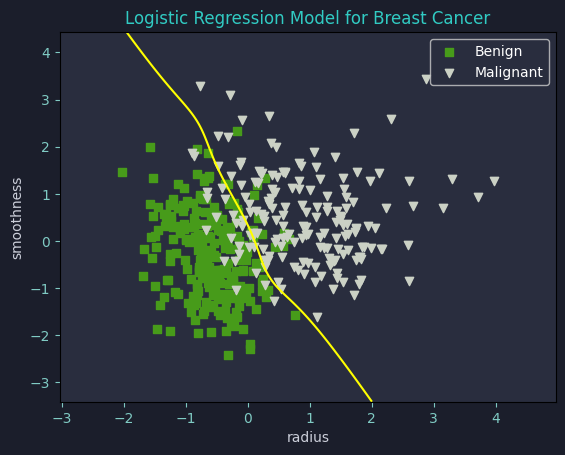

In [51]:
dscboundary(x_train , y_train, w, b,degree,1)

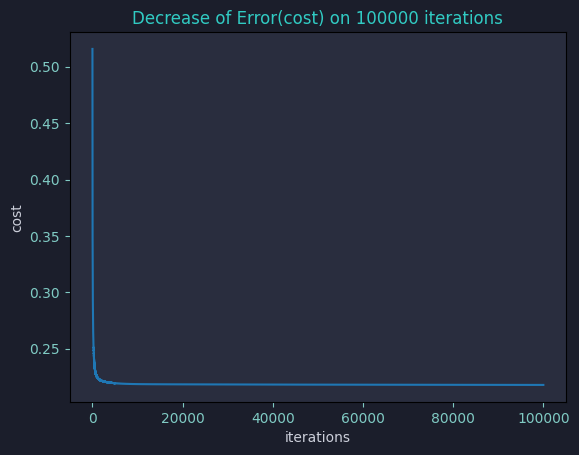

In [49]:
fig, ax = plt.subplots()

theme= ['#1b1e2b','#31CBC3','#80cbc4','#CCCFDA','#292d3e']

fig.patch.set_facecolor(theme[0])
ax.set_facecolor(theme[4])

ax.set_xlabel('iterations')
ax.set_ylabel('cost')

ax.set_title(f'Decrease of Error(cost) on {iteration} iterations',color=theme[1])

ax.tick_params(axis='x', colors=theme[2])
ax.tick_params(axis='y', colors=theme[2])

ax.xaxis.label.set_color(theme[3])
ax.yaxis.label.set_color(theme[3])

xaxis = np.arange(0,iteration,1)
ax.plot(xaxis,jhist)

$$f_{(w,b)}(z) = \frac{1}{1+e^{-z}}$$
$$z = w.x+b$$
<br><br>
$$j_{(w,b)} = \frac{1}{m}\sum_{i=1}^{m}[loss(f_{(w,b)}(x^i),y^i]$$
$$loss = -y^i.log(f_{(w,b)}x^i)-(1-y^i).log(1-f_{(w,b)}x^i)$$
<br><br>
$$\frac{dJ_{(w,b)}}{dw_j} = \frac{1}{m}\sum_{i=1}^{m}(f_{(w,b)}(x^i)-y^i).x_j^i$$
$$\frac{dJ_{(w,b)}}{db} = \frac{1}{m}\sum_{i=1}^{m}(f_{(w,b)}(x^i)-y^i).1$$
<br><br>
$$w_j = w_j - \alpha.\frac{dJ_{(w,b)}}{dw_j}$$
$$b = b - \alpha.\frac{dJ_{(w,b)}}{db}$$